## Homework 2
 - ### Release Date: Friday, February 14
 - ### Due Date: Tuesday, February 25 at 12:00PM

### Introduction

In this homework, we will use data provided by the New York City Department of Health and Mental Hygiene. The table contains information about inspections of each of New York City's 24,000 restaurants. Each restaurant receives a grade of A,B,C based on a score that tallies points from health violations. 

Please see the following [link](https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf) for information. We have made the data available to you in `/shared` folder on JupyterHub (refer csv file: `nyc_restaurant_inspections.csv`). 

We want to understand the scoring of restaurants. We will walk through the various steps of exploratory data analysis with you providing insights along the way to give you a sense for each discovery and its implication.

As we clean and explore data, you will gain practice with:
* Reading simple csv files
* Working with data at different levels of granularity
* Identifying the type of data collected, missing values, outliers, etc.

We will guide you through the problems step by step. However, we encourage you to discuss with us in Office Hours and on Piazza so that we can work together through these steps. 

#### Submission Instructions

Submission of homework requires two steps. See **Homework 0** for more information.

##### _Step 1_
You are required to **submit your notebook on JupyterHub**. Please navigate to the `Assignments` tab to  
- fetch
- modify 
- validate
- submit 

your notebook. Consult the [instructional video](https://nbgrader.readthedocs.io/en/stable/user_guide/highlights.html#student-assignment-list-extension-for-jupyter-notebooks) for more information about JupyterHub.

##### _Step 2_
You are required to **submit a copy of your notebook to Gradescope**. Follow these steps

##### _Formatting Instructions_


1. Download as HTML (`File->Download As->HTML(.html)`). 
1. Open the HTML in the browser. Print to .pdf 
1. Upload to Gradescope. Consult the [instructional video](https://www.gradescope.com/get_started#student-submission) for more information about Gradescope. 
1. Indicate the location of your responses on Gradescope. You must tag your answer's page numbers to the appropriate question on Gradescope. See instructional video for more information.

Note that 

- You should break long lines of code into multiple lines. Otherwise your code will extend out of view from the cell. Consider using `\` followed by a new line. 
- For each textual response, please include relevant code that informed your response. 
- For each plotting question, please include the code used to generate the plot. If your plot does not appear in the HTML / pdf output, then use `Image('name_of_file')` to embed it.
- You should not display large output cells such as all rows of a table. Instead convert the input cell from Code to Markdown back to Code to remove the output cell.

**Important**: Gradescope points will be awarded if and only if all the formatting instructions are followed. 

#### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Name:** Richie Doherty

**NetId:** rd2414

**Collaborators:** Madi Ella-Deane Perez

#### Rubric

Question | Points
--- | ---
Gradescope | 2 
1a | 0
1b | 0
2a | 1
2b | 1
2c | 2
3a | 1
3b | 2
3c | 3
4a | 1
4b | 1
4c | 2
Total | 16

To start the assignment, run the cell below to set up some imports. In many of these assignments (and your future adventures as a data scientist) you will use `pandas`, `numpy` and `matplotlib.pyplot`. Import each of these libraries `as` their commonly used abbreviations (e.g., `pd`, `np` and `plt`).  

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set some parameters in the packages 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150

pd.options.display.max_rows = 20  
pd.options.display.max_columns = 15

# Some packages to help with configuration
from IPython.display import display, Latex, Markdown, Image
import os

In [84]:
# TEST 

import sys
assert 'pandas' in sys.modules and pd
assert 'numpy' in sys.modules and np
assert 'matplotlib' in sys.modules and plt
assert 'os' in sys.modules and os

---
## 1: Loading NYC restaurant data

Let's start with understanding the structure of the data. Recall this involves answering questions such as 

* Is the data organized in records?
* What are the fields in each record?

### Question 1a: Reading CSV file

Let's attempt to load `nyc_restaurant_inspections.csv` into pandas data frame with the following name: `res`. 

In [85]:
dsDir = os.environ["HOME"] + "/shared/"
fileName = 'nyc_restaurant_inspections.csv'

res = pd.read_csv(dsDir + fileName)

Now that you've read in the files, let's try some `pd.DataFrame` methods.
Use the `DataFrame.head` command to show the top few lines of the `res` dataframe.

In [86]:
res.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,...,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,50042763,MULTISERVICIOS INCOME TAX (HERBALIFE),QUEENS,9752,CORONA AVE,11368.0,3478589910,...,Facility not vermin proof. Harborage or condit...,Not Critical,21.0,B,12/13/2017,11/05/2018,Cycle Inspection / Re-inspection
1,41435182,LA GRAN URUGUAYA BAKERY & RESTAURANT,QUEENS,8506,37 AVENUE,11372.0,7185050404,...,"Food contact surface not properly washed, rins...",Critical,27.0,B,07/09/2018,11/05/2018,Cycle Inspection / Re-inspection
2,50057067,PEPPA'S JERK CHICKEN RESTAURANT,BROOKLYN,689,UTICA AVE,11203.0,3473833127,...,Wiping cloths soiled or not stored in sanitizi...,Critical,32.0,NaN,NaN,11/05/2018,Pre-permit (Operational) / Initial Inspection


The `DataFrame.describe` method can also be handy for computing summaries of various statistics of our dataframes. Try it out the dataframe.

In [87]:
stats = ['mean', 'max', 'min', 'std']
res.describe().loc[stats]

,CAMIS,ZIPCODE,SCORE
mean,4.543635e+07,10676.178303,19.544726
max,5.008574e+07,11697.000000,156.000000
min,3.007544e+07,10000.000000,-1.000000
std,4.419835e+06,596.709899,13.910111


### Question 1b: Verify your file was read correctly

Now, we perform some checks for you to verify that you loaded the data with the right structure. Run the following cells to load some basic utilities (you do not need to change these at all):

First, we check the size of the table you created:

In [88]:
# TEST

assert all(res.columns == ['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET','ZIPCODE',
                               'PHONE','CUISINE DESCRIPTION','INSPECTION DATE','ACTION',
                                   'VIOLATION CODE','VIOLATION DESCRIPTION','CRITICAL FLAG','SCORE',
                                       'GRADE','GRADE DATE','RECORD DATE','INSPECTION TYPE'])
assert 381834 <= len(res) <= 381834

Next we'll check that the statistics match what we expect. The following are hard-coded statistical summaries of the correct data. .

In [89]:
# TEST 

res_summary = pd.DataFrame(columns = ['SCORE'],
 data =  [19.544726, 156.000000, -1.000000,  13.910111],
 index = ['mean', 'max', 'min', 'std'])

assert all(np.isclose(res[["SCORE"]].describe().loc[stats].values, res_summary.values))

print('What we expect from your dataframe:')
res_summary

What we expect from your dataframe:


,SCORE
mean,19.544726
max,156.000000
min,-1.000000
std,13.910111


---
## 2: Examining the data

We will explore the table to better understand the information behind it. 

### Question 2a

Examining the entries in the data frame `res`, we notice the `CAMIS` columns. Are the values in the `CAMIS` column value unique amongst records? 

1. Use `value_counts` to count the values in the `CAMIS` column
1. Use `max` to check the largest count from among the values. 

Note that maximum greater than 1 indicates the presence of duplicates values in the `CAMIS` column 

Your code should compute the answer. Please don't just hard code "True/False".

In [90]:
CAMIS_COUNTS = res['CAMIS'].value_counts().max()
if CAMIS_COUNTS > 1:
    is_camis_id_unique = False

else:
    is_camis_id_unique = True


is_camis_id_unique
# YOUR CODE HERE
#raise NotImplementedError()

False

In [91]:
res['CAMIS'].value_counts().max()

94

In [92]:
# TEST
assert is_camis_id_unique in [True, False]


### Question 2b

Determine the distinct number of grades (`GRADE`) in the dataframe `res`. Call it `count_distinct_grades`.

1. Use `unique` to determine the collection of unique values in the `GRADE` column

In [93]:
count_distinct_grades = res['GRADE'].nunique()
count_distinct_grades
# YOUR CODE HERE
#raise NotImplementedError()

6

In [94]:
res['GRADE'].unique()

array(['B', nan, 'A', 'Not Yet Graded', 'Z', 'C', 'P'], dtype=object)

In [95]:
# TEST

assert 1 < count_distinct_grades < 10


### Question 2c

What kind of values are in the `ZIPCODE` column in the `res` data frame?  

$1.$ Are zip codes quantitative or qualitative? If qualitative, is it ordinal or nominal? If quantitative, is it continuous or discrete? 

In [96]:
q2c1_answer = "qualitative and nominal"
res[["ZIPCODE"]].head()
# YOUR CODE HERE
#raise NotImplementedError()

,ZIPCODE
0,11368.0
1,11372.0
2,11203.0
3,11418.0
4,11417.0


In [97]:
# TEST 

assert q2c1_answer in ["qualitative and ordinal", "qualitative and nominal", "quantitative and continuous", "quantitative and discrete"]



$2.$ How are the zip code values encoded in python: ints, floats, strings, booleans? You should use  `dtypes` command on dataframe.

In [98]:
q2c2_answer = "float"
type(res["ZIPCODE"][0])
# YOUR CODE HERE
#raise NotImplementedError()

numpy.float64

In [99]:
# TEST 

assert q2c2_answer in ["float", "int", "bool", "string"]



$3$. To explore the zip code values, it makes sense to examine counts, i.e., the number of records  that have the same zip code value. This is essentially answering the question: How many restaurants are in each zip code? 

In the cell below, create a series where the index is the zipcode and the value is the number of restaurants in that zipcode. For example, in zip code 10003, there should be 10,014 restaurants. 

1. Use `groupby` with `ZIPCODE` to group the records by zipcode
1. Apply `size` to determine the number of records in each group
1. Use `sort_values`with `ascending = False` to order the zipcodes by the number of records

Your series should be in descending order meaning the value 10014 should be at the top corresponding to zipcode 10003. 

If you get stuck, then look at the code in the Question 2c-4 below.

In [100]:
zip_counts = res.groupby("ZIPCODE").size().sort_values(ascending = False)

# YOUR CODE HERE
#raise NotImplementedError()
zip_counts

ZIPCODE
10003.0    10014
10019.0     9164
10036.0     8407
10013.0     8153
10002.0     7441
           ...  
10110.0        6
10107.0        6
10172.0        5
10080.0        3
10155.0        2
Length: 223, dtype: int64

$4$. Unless you know pandas well already, your answer probably has one subtle flaw in it: it fails to take into account restaurants with missing zip codes. Unfortunately, missing data is just a reality when we're working with real data.

There are a couple of ways to include null zip codes in the zip_counts series above. One approach is to use `fillna`, which will replace all null (a.k.a. NaN) values with a string of our choosing. In the example below, we picked "?????". When you run the code below, you should see that there are 5884 restaurants with missing zip code.

In [101]:
zip_counts = res.fillna("?????").groupby("ZIPCODE").size().sort_values(ascending=False)
zip_counts.head(15)

ZIPCODE
10003.0    10014
10019.0     9164
10036.0     8407
10013.0     8153
10002.0     7441
10016.0     7000
10001.0     6857
10022.0     6310
11220.0     6289
11354.0     6275
10011.0     6236
?????       5884
10012.0     5872
11372.0     5713
11201.0     5673
dtype: int64

## 3: Understanding Restaurant Scores

We want to get a better understanding for how the New York City Department of Health and Mental Hygiene assigns scores. Let's start by determining missing score.

### Question 3a

How many restaurants are missing `SCORE` values?

1. Use `isnull` to assign 
        - `True` for missing value 
        - `False` for present value
2. Use `sum` to count the number of missing values 
        - Python will convert `True` to 1 and `False` to 0
        - For example, `sum([True, False])` equals 1
 
If you get stuck then see the code for Question 3b below.

In [102]:
pd.isnull(res['SCORE'])
missing_scores = pd.isnull(res['SCORE']).sum()

# YOUR CODE HERE
#raise NotImplementedError()

In [103]:
pd.isnull(res['SCORE']).sum()

19327

In [104]:
# TEST 

assert 10000 < missing_scores < 20000


### Question 3b

Having studied zipcodes in Question 2c, let's try to identify which zip codes that are missing the most score values.

Create a series where the index is `ZIPCODE`, and the value is the number of restaurants with missing score in that zip code. Your series should be in descending order meaning zipcode 10003 should be at the top of the series, with the value 592.

1. Access the `SCORE` column
1. Group by the `ZIPCODE` column 
1. We have provided you code for a function called `count_null` that counts the number of missing values. You can compare it  to Question 3a. Use `agg` on the groups from Step 2 with `count_null`. If you get stuck with `agg` then see Question 3c-2 below for an example.
1. Use `sort_values` with `ascending = False`    

In [105]:


def count_null(s):
    return len(s[s.isnull()])

missing_zipcode = res["SCORE"].groupby(res["ZIPCODE"]).agg(count_null)
num_missing_in_each_zip = missing_zipcode.sort_values(ascending = False)

# YOUR CODE HERE
#raise NotImplementedError()
num_missing_in_each_zip

ZIPCODE
10003.0    592.0
10019.0    411.0
10002.0    398.0
10036.0    376.0
10013.0    370.0
           ...  
10048.0      0.0
10107.0      0.0
10155.0      0.0
10110.0      0.0
10080.0      0.0
Name: SCORE, Length: 223, dtype: float64

### Question 3c

$1$ Having counted the number of null values per zip code, we want to count the proportion of null values per zipcode. We need to write two functions comparable to `count_null`.

1. `count_non_null`: Input is a Series. Output is the number of values in the Series that are not null.
1. `fraction_null`: Input is a Series. Output is the fraction of values in the Series that are null.

Note that `notnull` complements `isnull`

In [106]:
def count_non_null(s):
    return len(s[s.notnull()])
# YOUR CODE HERE
#raise NotImplementedError()

def fraction_null(s):
    return count_null(s)/ (count_non_null(s) + count_null(s))
# YOUR CODE HERE
#raise NotImplementedError()

In [107]:
# TEST

assert callable(count_non_null) and callable(fraction_null)

$2$ Now we create a new dataframe `fraction_missing_df`. It contains counts of the null values, not null values and proportion of null values. It has an index called `ZIPCODE` along with 3 columns:

In [108]:
fraction_missing_df = res['SCORE'].groupby(res['ZIPCODE']).agg([count_non_null, count_null, fraction_null])
fraction_missing_df.head(3)

,count_non_null,count_null,fraction_null
ZIPCODE,,,
10000.0,27.0,1.0,0.035714
10001.0,6522.0,335.0,0.048855
10002.0,7043.0,398.0,0.053487


Use the method `rename` to replace `count_non_null`, `count_null`, `fraction_null` with `Count Valid`, `Count Missing` and `Proportion Missing`.

In [109]:
# YOUR CODE HERE
fraction_missing_df.rename(columns = {'count_non_null': 'Count Valid', \
                                            'count_null':'Count Missing', \
                                            'fraction_null': 'Proportion Missing'}, inplace = True)
#raise NotImplementedError()


In [110]:
# TEST 

assert set(fraction_missing_df.columns) == set(["Count Valid","Count Missing", "Proportion Missing"])

$3.$ Create a new data frame called `fraction_missing_df_sorted` by sorting `fraction_missing_df` with the fraction of null values. The order should be descending meaning that zipcode 10158 should be on top corresponding to 0.3333333 

In [111]:
fraction_missing_df_sorted = fraction_missing_df.sort_values('Proportion Missing', ascending = False)
fraction_missing_df_sorted
# YOUR CODE HERE
#raise NotImplementedError()

,Count Valid,Count Missing,Proportion Missing
ZIPCODE,,,
10158.0,4.0,2.0,0.333333
10176.0,9.0,4.0,0.307692
11371.0,11.0,3.0,0.214286
10170.0,29.0,5.0,0.147059
10173.0,7.0,1.0,0.125000
...,...,...,...
10168.0,18.0,0.0,0.000000
10178.0,29.0,0.0,0.000000
10171.0,10.0,0.0,0.000000


In [112]:
# TEST 

assert abs(fraction_missing_df_sorted.iloc[0,2] - 1.0/3.0) < 1e-3


### 4: Distribution of Scores across New York 

### Question 4a

Read all rows from the `GRADE` and `BORO` column into a DataFrame called `inspection`. 

In [113]:
inspection = res[["GRADE", "BORO"]]
inspection
# YOUR CODE HERE
#raise NotImplementedError()

,GRADE,BORO
0,B,QUEENS
1,B,QUEENS
2,NaN,BROOKLYN
3,NaN,QUEENS
4,A,QUEENS
...,...,...
381829,NaN,MANHATTAN
381830,A,MANHATTAN
381831,NaN,MANHATTAN
381832,A,BRONX


In [114]:
# TEST 

assert inspection.shape[1] == 2


### Question 4b

Filter `inspection` to contain rows with grade A,B, or C in the `GRADE` column. Call the resulting Data Frame `inspection_cleaned_grades`.

1. Access the `GRADE` column of `inspection`.
1. Use `isin` to check whether the value is contained in `['A','B','C']`

In [115]:
inspection_cleaned_grades = inspection[inspection['GRADE'].isin(["A","B","C"])]


# YOUR CODE HERE
#raise NotImplementedError()
inspection_cleaned_grades

,GRADE,BORO
0,B,QUEENS
1,B,QUEENS
4,A,QUEENS
6,A,MANHATTAN
8,A,MANHATTAN
...,...,...
381826,A,QUEENS
381827,A,BRONX
381830,A,MANHATTAN
381832,A,BRONX


In [116]:
# TEST
assert inspection_cleaned_grades.shape[1] == 2


### Question 4c

Some of the entries in `BORO` column contain the value `Missing`. Filter `inspection_cleaned_grades` to remove rows containing `Missing`. Call the resulting Data Frame `inspection_cleaned`. 

1. We have provided you with a function called `check_contains_missing`. 
1. Use the function with `applymap` to determine the rows in `BORO` column containing the value 'Missing'. 
1. Use `~` to access the rows with the value `Missing`.

In [117]:
def check_contains_missing(s):
    return "Missing" in s

inspection_cleaned = inspection_cleaned_grades[~inspection_cleaned_grades['BORO'].map(check_contains_missing)]
inspection_cleaned
# YOUR CODE HERE
#raise NotImplementedError()

,GRADE,BORO
0,B,QUEENS
1,B,QUEENS
4,A,QUEENS
6,A,MANHATTAN
8,A,MANHATTAN
...,...,...
381826,A,QUEENS
381827,A,BRONX
381830,A,MANHATTAN
381832,A,BRONX


In [118]:
# TEST 

assert inspection_cleaned[~inspection_cleaned['BORO'].isin(['QUEENS', 'BROOKLYN', 'BRONX', 'MANHATTAN', 'STATEN ISLAND'])].shape[0] == 0


### Question 4c

We want to determine the number of grades `A`,`B`,`C` amongst the five boroughs. We need to group by both `GRADE` and `BORO`.
 
1. Use `groupby` to group `inspection_cleaned` by `["GRADE", "BORO"]`.
1. Use `size` to count the number of restaurants in each group.

Name the resulting Data Frame `inspection_cleaned_groups`.

In [119]:
inspection_cleaned_groups = inspection_cleaned.groupby(["GRADE", "BORO"]).size()

# YOUR CODE HERE
#raise NotImplementedError()
inspection_cleaned_groups

GRADE  BORO         
A      BRONX            13687
       BROOKLYN         37468
       MANHATTAN        60752
       QUEENS           34828
       STATEN ISLAND     5232
B      BRONX             2417
       BROOKLYN          6302
       MANHATTAN         9285
       QUEENS            5481
       STATEN ISLAND      909
C      BRONX              841
       BROOKLYN          1863
       MANHATTAN         2900
       QUEENS            1527
       STATEN ISLAND      214
dtype: int64

Run the following code to generate a bar chart. Remember that a bar chart and histogram both capture counts or frequencies of a single variable. However, bar charts plot qualitative data with the height indicating the count or frequency for each category.

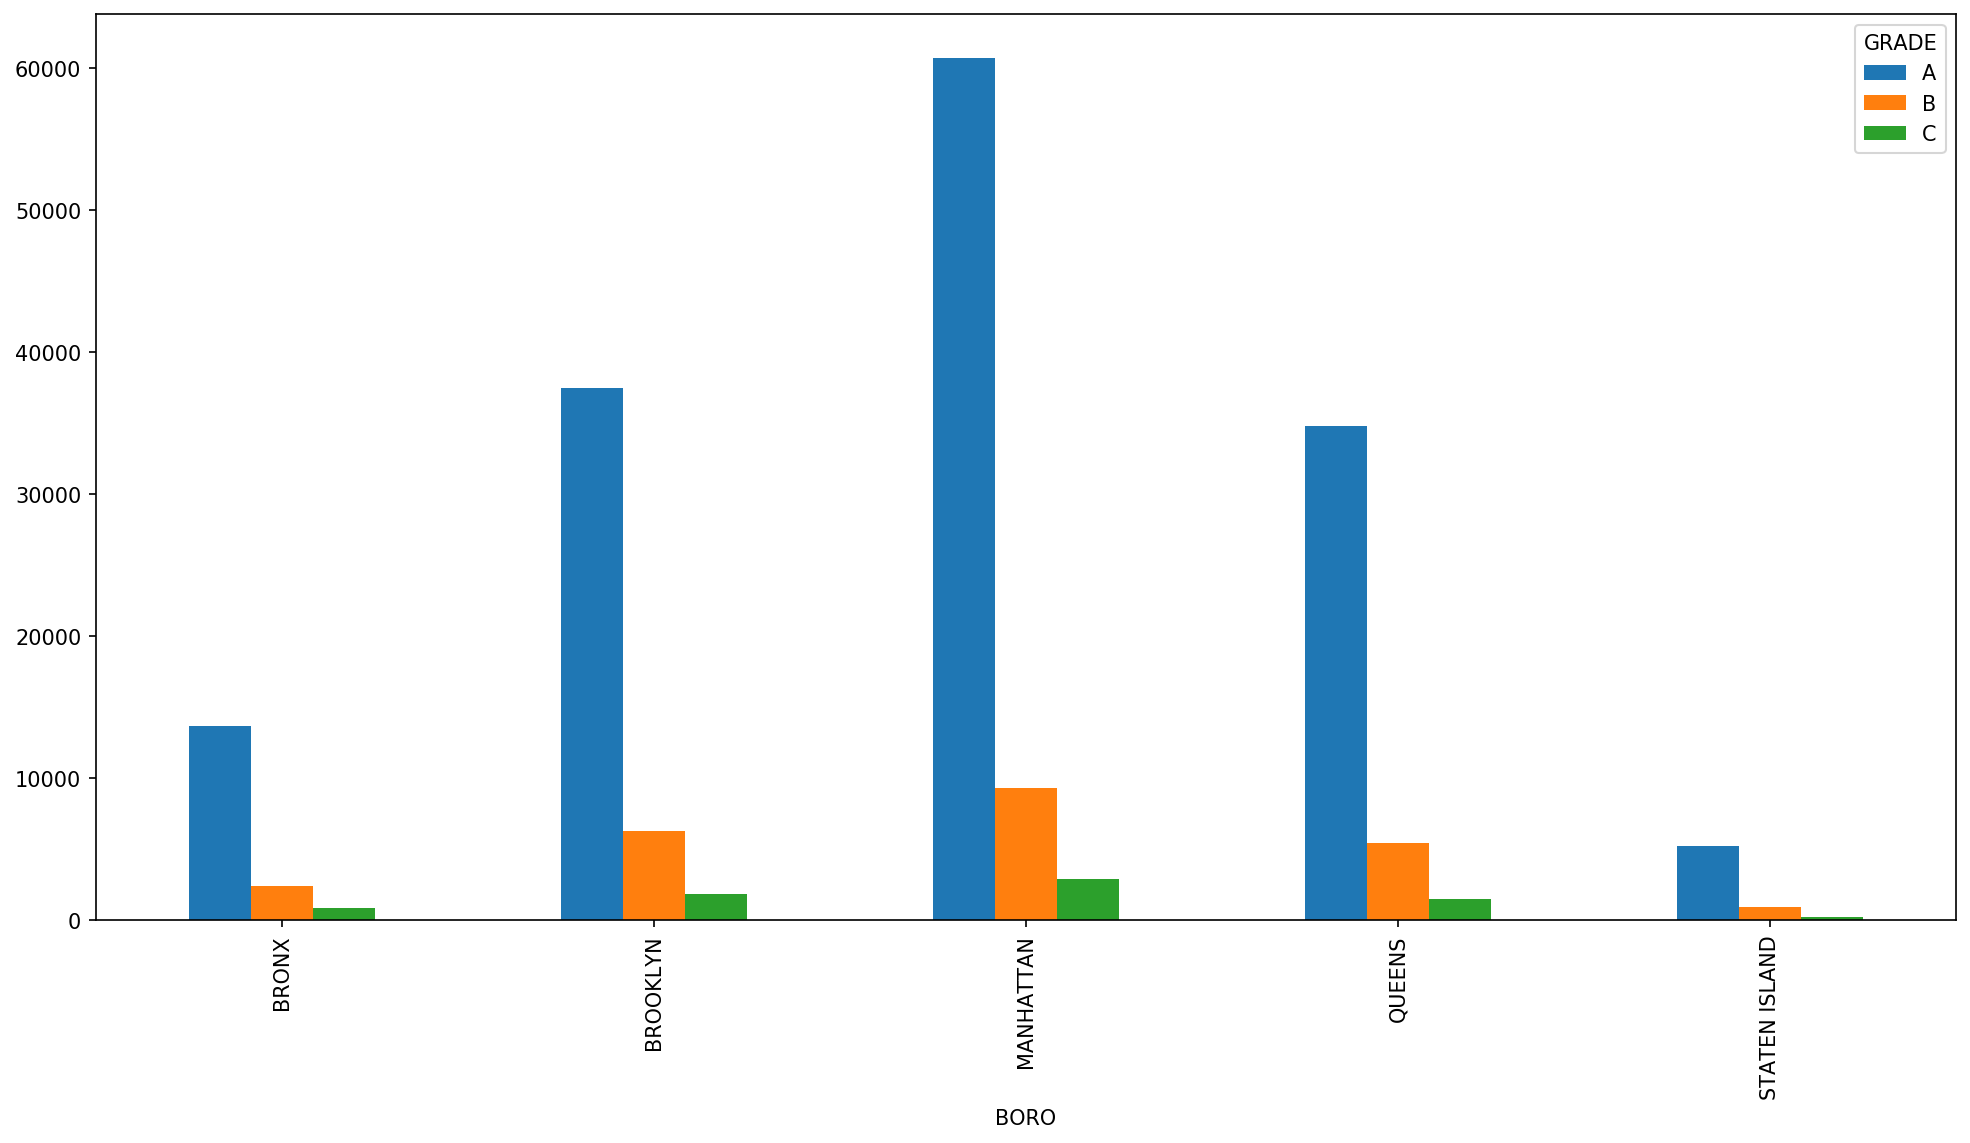

In [120]:
inspection_cleaned_groups.unstack(level=0).plot(kind="bar");

Based on the bar chart, where would you prefer to find a restaurant? In other words, which boroughs have the most sanitary food?

**YOUR ANSWER HERE**
Just by looking at the visual it apears that manhattan has the highest proportion and number of grade A restuarants. I would most likely choose manhattan just because they have the highest proportion of grade A restuarants.

## Congrats !

You are finished with HW2. We have covered many components of the `pandas` package. Please see the [documentation](https://pandas.pydata.org/pandas-docs/stable/) for more information about these methods from the assignment:

- `read_csv`
- `value_counts`
- `sort_values`
- `unique`
- `groupby`
- `agg`
- `isnull`
- `notnull`
- `fillna`
- `rename`
- `isin`